# Search for "Engenheiro de Produção" (production engineer) in 3 job search websites: Indeed, Linkedin and Catho. Extract data from these work oportunities and create word clouds to analyse variables such as job title, city, company, salary and a brief description of the job. 

## Import libs

In [1]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from bs4 import BeautifulSoup

## Define stop words (words that should be avoided when creating the word clouds)

In [2]:
#stopwords list
stopwords = set(STOPWORDS)
stopwords.update(['da', 'de', 'o', 'e', 'em', 'dos','das', 'como', 'dia', 'tendo', 'área', 'dando', 'norteadoras', 'sua', 'na',
                 'campo', 'seu', 'engenharia', 'américa', 'CASSI', 'ainda', 'que','mão','vida','é','através', 'empresa',
                 'atividade', 'atividades','nós','pelo', 'propósito', 'cana','açucar','açúcar', 'todas', 'line', 'fases','façamos',
                 'parte','trabalho','haverá', 'matéria', 'emitir','anos', 'obra','produção','cargo','funcionamento','sul','agregamos',
                 'setor', 'ou','linha','desse', 'dessa', 'só', 'cresce','venha', 'fazer', 'tipo', 'os', 'as', 'plano','tempo','vaga',
                 'ribas','local','apontando','integral','efetivo','afins','há','norte', 'buscamos','pessoas','acima','mais',
                 'mercado','relacionado','nosso', 'médicos','recicladoras','sobre','por','mundo','estamos','tomando',
                 'fazenda','nova','engenheiro','produção'])

## Extract data from indeed

In [3]:
#extract data
def extract(page):
    headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.88 Safari/537.36'}
    url = f'https://br.indeed.com/jobs?q=engenheiro%20de%20produ%C3%A7%C3%A3o&start=10&vjk={page}'
    r = requests.get(url, headers)
    soup = BeautifulSoup(r.content, 'html.parser')
    return soup

#transform data
def transform(soup):
    divs = soup.find_all('div', class_ = 'job_seen_beacon')
    for item in divs:
        title = item.find('h2', class_ = 'jobTitle').text.strip()
        company = item.find('span', class_ = 'companyName').text.strip()
        city = item.find('div', class_ = 'companyLocation').text.strip()
        try:
            salary = item.find('div', class_ = 'salary-snippet').text.strip()#é div mesmo?
        except:
            salary = ''
        summary = item.find('div', class_ = 'job-snippet').text.strip()
        
        #list with each devs information
        job = {
            'title': title,
            'company': company,
            'city': city,
            'salary': salary,
            'summary': summary
        }
        joblist_indeed.append(job)  
    return

joblist_indeed = []

for i in range(0,600,10):
    c = extract(0)
    transform(c)

#list to dataframe
df_indeed = pd.DataFrame(joblist_indeed)

#save indeed dataframe
df_indeed.to_csv('df_indeed.csv')

In [4]:
#read indeed dataframe
df_indeed = pd.read_csv(r"C:\Users\marin\Downloads\jupyter\df_indeed.csv")

## Extract data from Linkedin

In [5]:
#extract data from linkedin
def extract(page):
    headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.88 Safari/537.36'}
    url = f'https://www.linkedin.com/jobs/search?keywords=Engenheiro%20De%20Produ%C3%A7%C3%A3o&location=Brazil&geoId=106057199&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum={page}'
    r = requests.get(url, headers)
    soup = BeautifulSoup(r.content, 'html.parser')
    return soup

#transform data from linkedin
def transform(soup):
    divs = soup.find_all('div', class_ = 'base-search-card__info')
    for item in divs:
        title = item.find('h3', class_ = 'base-search-card__title').text.strip()
        company = item.find('h4', class_ = 'base-search-card__subtitle').text.strip()
        city = item.find('span', class_ = 'job-search-card__location').text.strip()
        
        job = {
            'title': title,
            'company': company,
            'city': city
            }
        joblist_linkedin.append(job)  
    return

joblist_linkedin = []

c = extract(0)
transform(c)

#list to dataframe
df_linkedin = pd.DataFrame(joblist_linkedin)

#save linkedin dataframe
df_linkedin.to_csv('df_linkedin.csv')

In [6]:
#read linkedin dataframe
df_linkedin = pd.read_csv(r"C:\Users\marin\Downloads\jupyter\df_linkedin.csv")

## Extract data from Catho

In [7]:
#extract data from catho
def extract(page):
    headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.88 Safari/537.36'}
    url = f'https://www.catho.com.br/vagas/engenheiro-de-producao/?q=Engenheiro%20de%20Produ%C3%A7%C3%A3o&page={page}'
    r = requests.get(url, headers)
    soup = BeautifulSoup(r.content, 'html.parser')
    return soup

#transform data from catho
def transform(soup):
    divs = soup.find_all('article', class_ = 'Card__CardWrapper-sc-om5cci-0 hqncyC sc-caSCKo kfXitO')
    for item in divs:
        title = item.find('h2', class_ = 'Title__Heading-sc-14fvmc0-0 fGTSAd sc-hzDkRC hptbnR').text.strip()
        company = item.find('p', class_ = 'sc-jhAzac khzPgq').text.strip()
        city = item.find('button', class_ = 'sc-cJSrbW kdJhDg').text.strip()
        summary = item.find('span', class_ = 'job-description').text.strip()
        
        job = {
            'title': title,
            'company': company,
            'city': city,
            'summary': summary
            }
        joblist_catho.append(job)  
    return

joblist_catho = []

for i in range(2,30,1):
    c = extract(2)
    transform(c)

#list to dataframe
df_catho = pd.DataFrame(joblist_catho)

#save catho dataframe
df_catho.to_csv('df_catho.csv')

In [8]:
#read catho dataframe
df_catho = pd.read_csv(r"C:\Users\marin\Downloads\jupyter\df_catho.csv")

## Join all three dataframes

In [9]:
#put linkedin, catho and indeed dfs together
df_indeed_linkedin_catho = pd.concat([df_indeed,df_linkedin,df_catho])

## Separate columns in diferrent lists

In [10]:
#create df for title, company, city, salary and summary
title = df_indeed_linkedin_catho['title']
company = df_indeed_linkedin_catho['company']
city = df_indeed_linkedin_catho['city']
salary = df_indeed_linkedin_catho['salary']
summary = df_indeed_linkedin_catho['summary']

## Put all the words together in each list

In [11]:
#concatenate all words in city
all_title = " ".join(s for s in title)
all_company = " ".join(s for s in company)
all_city = " ".join(s for s in city)
all_summary = " ".join(s for s in summary.astype(str))

## Create wordclouds for title, company, city and summary

In [12]:
#ganerate wordcloud_title_indeed_linkedin_catho
wordcloud_title_indeed_linkedin_catho = WordCloud(stopwords=stopwords,
                     background_color='black',
                     width = 1600,
                     height = 800, max_words = 2000, max_font_size = 200, min_font_size = 1).generate(all_title)

#ganerate wordcloud_company_indeed_linkedin_catho
wordcloud_company_indeed_linkedin_catho = WordCloud(stopwords=stopwords,
                     background_color='black',
                     width = 1600,
                     height = 800, max_words = 2000, max_font_size = 200, min_font_size = 1).generate(all_company)

#ganerate wordcloud_city_indeed_linkedin_catho
wordcloud_city_indeed_linkedin_catho = WordCloud(stopwords=stopwords,
                     background_color='black',
                     width = 1600,
                     height = 800).generate(all_city)

#ganerate wordcloud_summary_indeed_linkedin_catho
wordcloud_summary_indeed_linkedin_catho = WordCloud(stopwords=stopwords,
                     background_color='black',
                     width = 1600,
                     height = 800).generate(all_summary)

## Show every wordcloud

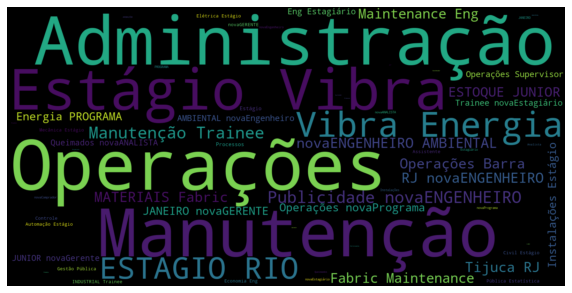

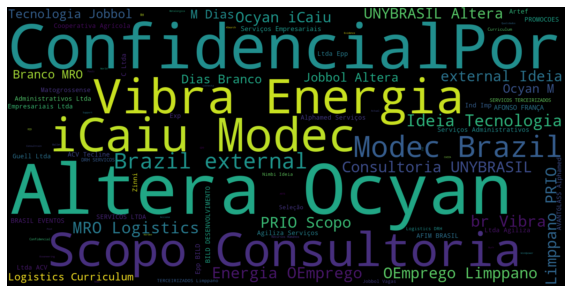

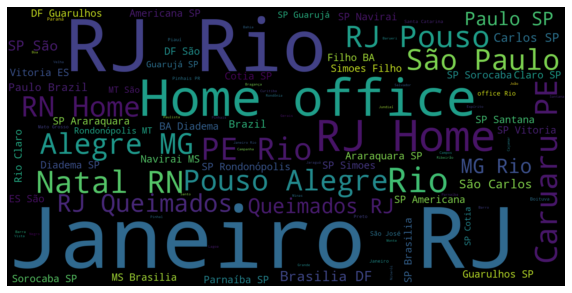

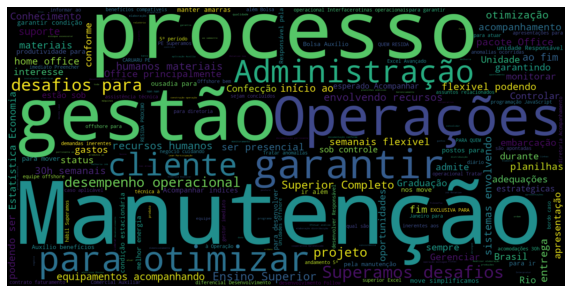

In [13]:
#show wordcloud_title_indeed_linkedin_catho
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud_title_indeed_linkedin_catho, interpolation='bilinear')
ax.set_axis_off()
#save wordcloud_title_indeed_linkedin_catho to file
wordcloud_title_indeed_linkedin_catho.to_file('wordcloud_title_indeed_linkedin_catho.png')

#show wordcloud_company_indeed_linkedin_catho
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud_company_indeed_linkedin_catho, interpolation='bilinear')
ax.set_axis_off()
#save wordcloud_company_indeed_linkedin_catho to file
wordcloud_company_indeed_linkedin_catho.to_file('wordcloud_company_indeed_linkedin_catho.png')

#show wordcloud_city_indeed_linkedin_catho
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud_city_indeed_linkedin_catho, interpolation='bilinear')
ax.set_axis_off()
#save wordcloud_city_indeed_linkedin_catho to file
wordcloud_city_indeed_linkedin_catho.to_file('wordcloud_city_indeed_linkedin_catho.png')

#show wordcloud_summary_indeed_linkedin_catho
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud_summary_indeed_linkedin_catho, interpolation='bilinear')
ax.set_axis_off()
#save wordcloud_summary_indeed_linkedin_catho to file
wordcloud_summary_indeed_linkedin_catho.to_file('wordcloud_summary_indeed_linkedin_catho.png')


## Find out maximum and minimum salary

In [14]:
#separate min and max from salary column
salary = pd.DataFrame(df_indeed['salary'].dropna(how="any", axis=0)) 
salary[['min','max']] = salary['salary'].str.split('-', expand=True)
salary["min"] = salary["min"].str.extract("(\d*\.?\d+)", expand=True)
salary["maxi"] = salary["max"].str.extract("(\d*\.?\d+)", expand=True)
salary = salary.drop(['salary'], axis = 1)

AttributeError: Can only use .str accessor with string values!

In [ ]:
#create dataframe for minimum salary
all_salary_min = salary['min'].min()
print('O menor salário entre as vagas é:',all_salary_min) 

In [ ]:
#create dataframe for maximum salary
salary_no_nan = salary.dropna(how="any", axis=0) 
all_salary_min_max = salary_no_nan['maxi'].max()
print('O maior salário entre as vagas é:',all_salary_min_max)